#Anna Hise
##Final Project Submission
December 14th, 2022

#Task 1: Libraries and Importing the Dataset

A **library** is a collection of related code modules that can be repeated within different programs to efficiently perform tasks within such as data manipulation, visualization, and modeling. Python libraries must be imported each time to access the objects and modules within them.


**Libraries imported for analysis and modeling of the census dataset**

* **Pandas** : Open source Python library with functions that allow you to explore, analyze, and clean/manipulate tabular data.

* **NumPy** : Open source Python library used when working with multi-dimensional arrays. NumPy allows for various complex mathematic functions.

* **matplotlib.pyplot** : Matplotlib is an open source Python library used for data visualization (plots/graphs/charts), and Pyplot is an API for matplotlib

* **seaborn** : Python visualization library used for statistical graphics and is based on matplotlib.

**sklearn** : Open source Python library used for predictive data analysis and offers tools for classification, regression, and clustering.



**Specific functions and modules imported from sklearn**

* **metrics** (Used to measure classification performance)

    * **sklearn.metrics**
        * classification_report, confusion_matrix,
recall_score, precision_score, f1_score, accuracy_score, make_scorer,
precision_recall_fscore_support, mean_absolute_error, mean_squared

    * **sklearn.neighbors**
        * KNeighborsClassifier, KNeighborsRegressor

    * **sklearn.cluster**
        * KMeans

    * **sklearn.preprocessing**
        * StandardScaler (used to scale and prepare data)

    * **sklearn.model_selection**
        * GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, cross_validate

    * **sklearn.dummy**
        * DummyClassifier

    * **sklearn.neural_network** (used in ANN models)
        * MLPClassifier 

    * **sklearn.svm** (used in support vector models)
        * SVC 
    

### **Loading Libraries**

In [1]:
#pandas library
import pandas as pd

#numPy library
import numpy as np

#matplotlib.pyplot library
import matplotlib.pyplot as plt

#seaborn library
import seaborn as sns



#Importing modules from sklearn for modeling and evaluation

#KNN
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

#StandardScaler used to scale the dataset for KNN
from sklearn.preprocessing import StandardScaler

#GridSearch/RandomizedSearch for hyperparameter tuning & cross validation functions to evaluate model performance
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, cross_validate

#Decision Tree
from sklearn import tree

#Metrics used for evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,\
recall_score, precision_score, f1_score, accuracy_score, make_scorer,\
precision_recall_fscore_support, mean_absolute_error, mean_squared_error

#DummyClassifier
from sklearn.dummy import DummyClassifier

#MLP
from sklearn.neural_network import MLPClassifier

#SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#mounting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing Data**

Importing the csv file into a Pandas Dataframe which displays the data in a tabular format (rows/columns)

In [2]:
census_original = pd.read_csv('https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/census.csv')
census = census_original.copy()

#Task 2: High Level Exploration

### **.info()** 




**df.info()** shows the overall structure of the dataframe and provides basic information about the data including: 

* Data types
* Number of columns/rows
* Total number of entries
* Number of **non-null** entries for each column
  * If this number is less than the total amount of entries it indicates that there are null values in that column 

In [3]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  y               32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Overall structure of this dataframe:** 
* total of **32561 entires** & **15 columns** including the target variable
* 6 columns containing numeric data types (int64)
  * age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

* 9 columns containing non-numeric (categorical) data types (object)
  * workclass, education, marital-status, occupation, relationship, race, sex, native-country, y (target variable)
  
  

### **.describe()**

**df.describe(include='all')** is used for datasets containing both numeric and non-numeric datatypes and returns the summary statistics of each column:

* count (number of entries)
* unique (number of unique values in that column)
* min/max values
* mean
* standard deviation
* 25%, 50%, and 75% percentile values 





In [4]:
census.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


* Each column has the same count which (also seen in the .info() command)

* All non-numeric columns have **unique values** while numeric columns do not. The number of unique values can also indicate how many additional columns will be created when dummy encoding is performed.

    **Unique values for non-numeric columns (including target variable):**
    * workclass: 9
    * education: 16
    * marital-status: 7
    * occupation: 15
    * relationship: 6
    * race: 5
    * sex: 2
    * native-country: 42
    * y: 2

* **Top and frequent** show the values in each column that have the highest count and that appear the most. Similar to unique, all non-numeric columns have top and frequent values whereas the numeric columns do not. These values can help reveal initial patterns in the dataset which will be helpful to keep in mind when performing EDA and modeling.

    **Top values for non-numeric columns (including target variable):**
    * workclass: Private
    * education: HS-Grad
    * marital-status: Married-civ-spouse
    * occupation: Prof-specialty
    * relationship: Husband
    * race: White
    * sex: Male
    * native-country: United-States
    * y: <=50K

 **Frequent values for non-numeric columns (including target variable):**
 The numeric values shown in the table represent the count of the category in that column that is the highest (checked this using value_count() command for each column)

    * workclass: 22696 (Private)
    * education: 10501 (HS-Grad)
    * marital-status: 14976 (Married-civ-spouse)
    * occupation: 4140 (Prof-specialty)
    * relationship: 13193 (Husband)
    * race: 27816 (White)
    * sex: 21790 (Male)
    * native-country: 29170 (United-States)
    * y: 24720 (<=50K)

* Each numeric column has mean, std, min/max, and interquartile percentages associated with it. 

    * **age**
     * mean: 39
      * std: 13.64
      * min: 17
      * max: 90
      * 25%: 28
      * 50%: 37
      * 75%: 48

    * **fnlwgt**
     * mean: 1.9+05
     * std: 1.01+05
     * min: 1.23+04
     * max: 1.49+06
     * 25%: 1.78+05
     * 50%: 1.78+05
     * 75%: 2.37+05

    * **education-num**
      * mean: 10.08
      * std: 2.57
      * min: 1
      * max: 16
      * 25%: 9
      * 50%: 10
      * 75%: 12

    * **capital-gain**
        * mean: 1077.65
	    * std: 7385.29
	    * min: 1.23+04
	    * max: 0
	    * 25%: 0
	    * 50%: 0
	    * 75%: 99999

    * **capital-loss**
	    * mean: 87.30
	    * std: 402.96
	    * min: 0
	    * max: 4356
	    * 25%: 0
	    * 50%: 0
	    * 75%: 0

    * **hours-per-week**
	    * mean: 40.44
	    * std: 12.35
	    * min: 1
	    * max: 40
	    * 25%: 40
	    * 50%: 45
	    * 75%: 99


### **Null Values**

Each column has 32561 non-null entries which would typically indicate that this dataset has no null values. However, the meta file stated that unknown values were converted to ' ?'

Using the .isin() command to search for entries containing ' ?' which will determine the number of null entries.

In [5]:
census.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
y                    0
dtype: int64

The results show that there are unknown values in 3 different columns: **workclass, occupation, and native-country**

Number of null values by column:
* workclass: 1836
* occupation: 1843
* native-country: 583



### **.head()**

df.head() default settings display the header row + the first 5 rows of the dataframe
  * It can also display a user specified number of rows

In [6]:
#showing the first 10 rows of the dataframe
census.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


#Task 3: Column by Column Exploration


##Numeric Columns

In [7]:
#creating variables for both numeric and non numeric columns to use for analysis
numeric_columns = census[['age','fnlwgt','education-num','capital-gain', 'capital-loss', 'hours-per-week']]
categorical_columns = census[['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'sex', 'native-country']]

creating a **seaborn heatmap** to visaulize correlations between numeric columns

[]

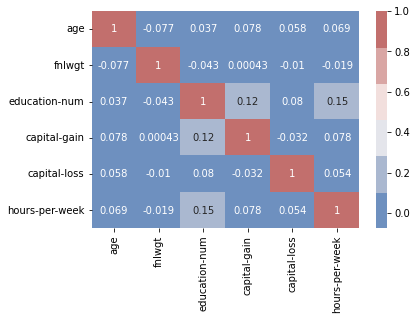

In [8]:
census_cor = numeric_columns.corr()

sns.heatmap(census_cor, 
            annot=True,
            cmap=sns.color_palette("vlag"), 
        xticklabels=census_cor.columns,
        yticklabels=census_cor.columns)

plt.plot()

* Creating a function called num_descriptives that returns the count, mean, standard deviation, min/max values, and the 25%, 50%, & 75% percentile ranges for each numeric column name that is passed into it
  * The values are displayed in both a boxplot and histogram

In [9]:
def num_descriptives(column_name):
  print(census[column_name].describe())
  census[column_name].plot(kind='box',title='Boxplot of %s' % (column_name))
  plt.show()
  census[column_name].plot(kind='hist',title='Histogram of %s' % (column_name))
  plt.show()

A for loop passes each column name listed into the function and displays the results.

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


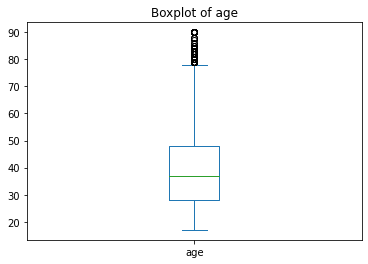

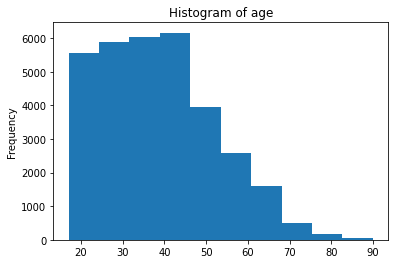

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


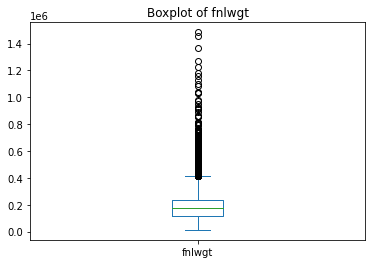

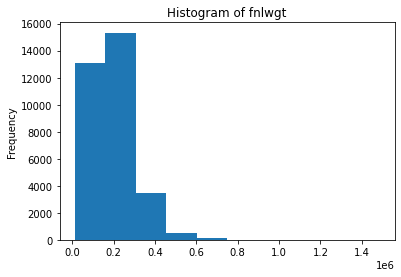

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64


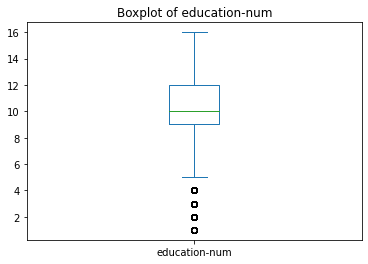

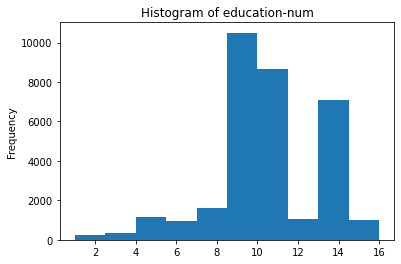

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


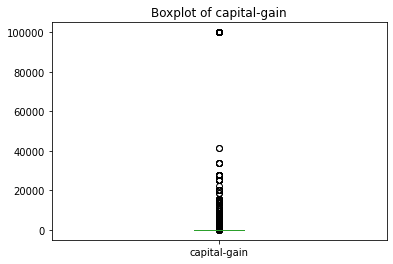

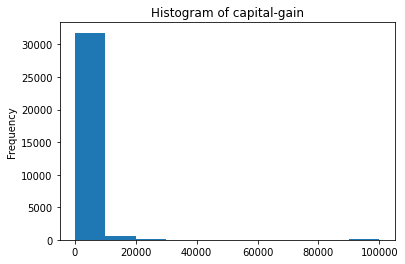

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64


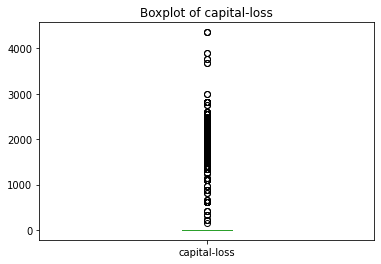

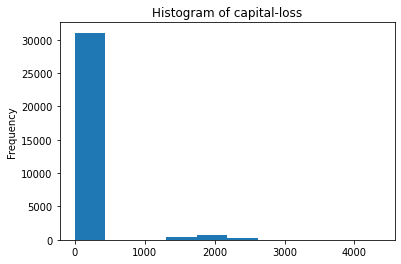

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


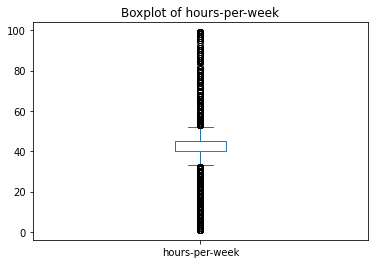

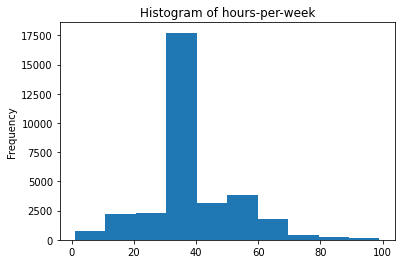

In [10]:
for column in numeric_columns:
  num_descriptives(column)

### Interpretation/Patterns
The heatmap shows that the numeric columns that are most correlated are:
* capital-gain and education_num (.12)
* hours-per-week and education_num (.15)
  * The rest of the variables were not strongly related (all had values under .1)


These correlations make sense because typically someone's level of education would impact their career choice which would lead to the correlation between the hours they work and their capital gain.
 
      

**age**
* The ages in this dataset range from 17 to 90 with the mean age being 38
* The histogram shows that most of the dataset falls within 20-45 years old 
 
**fnlwgt**
* This column refers to the weight of the observation in the total population based on "weighted tallies" of socio-economic characteristics of the population
* The data is skewed with the majoirty of the dataset between 0 and 0.2 with a significant drop at 0.3


**education-num**
* There seems to be the greatest distribution of individuals with education-num 9-11
* Frequency drops off at 12 and peaks again at 14

**capital-gain & capital-loss**
* Both columns are highly skewed
* The majority of the dataset falls at 0 with some outliers on both
  * capital-gain has outliers at 100,000 which we can assume relates to indivudals making >50K per year
  * There is a slight peak at 2,000 for capital-loss

**hours-per-week**
* Most individuals work 40 hours per week
* There is a small increase of invidiuals working between 50-60 hours per week as opposed to those working between 40-50 hours per week

## Non-Numeric Columns


* Creating a function called cat_descriptives that returns the value counts for each categorical column and displays a barplot of the counts

In [11]:
def cat_descriptives(column_name):
  print(census[column_name].value_counts())
  census[column_name].value_counts().plot(kind='bar',title='Barplot of %s' % (column_name))
  plt.show()

A for loop passes in each column and displays the results

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


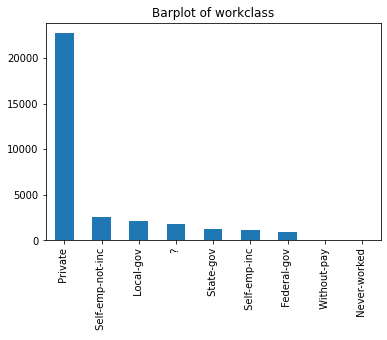

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


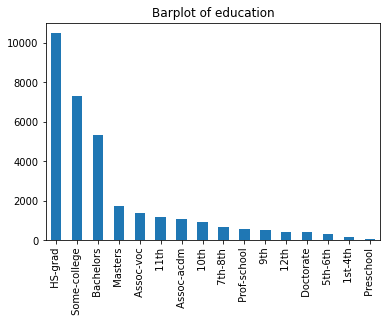

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64


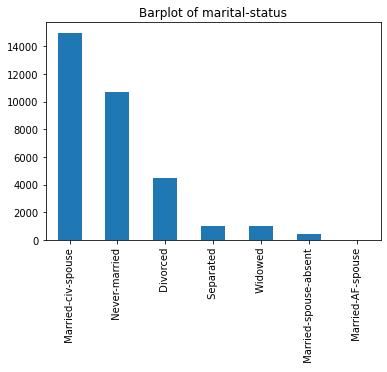

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


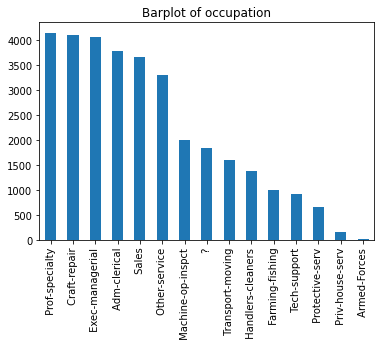

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64


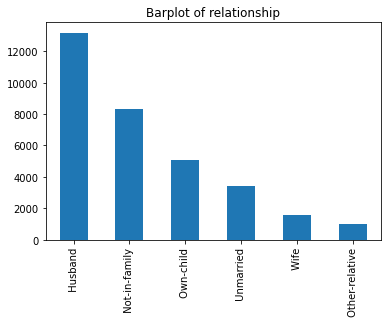

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


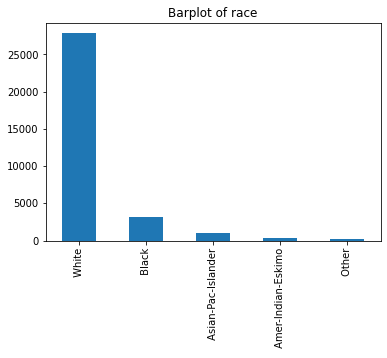

 Male      21790
 Female    10771
Name: sex, dtype: int64


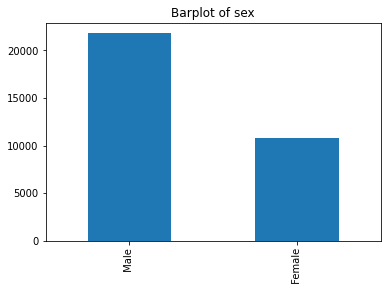

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

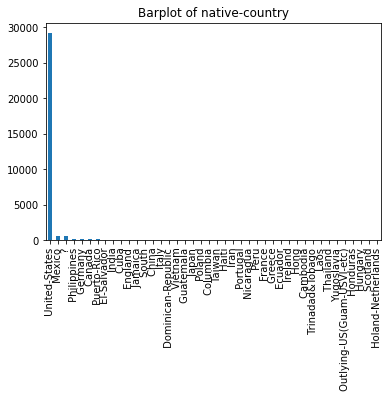

In [12]:
for column in categorical_columns:
  cat_descriptives(column)

Creating proportions of each categorical variable in the dataset

In [13]:
#workclass proportions
census.workclass.value_counts()/len(census)

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64

In [14]:
#education proportions
census.education.value_counts()/len(census)

 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64

In [15]:
#marital-status proportions
census['marital-status'].value_counts()/len(census)

 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: marital-status, dtype: float64

In [16]:
#occupation proportions
census.occupation.value_counts()/len(census)

 Prof-specialty       0.127146
 Craft-repair         0.125887
 Exec-managerial      0.124873
 Adm-clerical         0.115783
 Sales                0.112097
 Other-service        0.101195
 Machine-op-inspct    0.061485
 ?                    0.056601
 Transport-moving     0.049046
 Handlers-cleaners    0.042075
 Farming-fishing      0.030527
 Tech-support         0.028500
 Protective-serv      0.019932
 Priv-house-serv      0.004576
 Armed-Forces         0.000276
Name: occupation, dtype: float64

In [17]:
#relationship proportions
census.relationship.value_counts()/len(census)

 Husband           0.405178
 Not-in-family     0.255060
 Own-child         0.155646
 Unmarried         0.105832
 Wife              0.048156
 Other-relative    0.030128
Name: relationship, dtype: float64

In [18]:
#race proportions
census.race.value_counts()/len(census)

 White                 0.854274
 Black                 0.095943
 Asian-Pac-Islander    0.031909
 Amer-Indian-Eskimo    0.009551
 Other                 0.008323
Name: race, dtype: float64

In [19]:
#sex proportions
census.sex.value_counts()/len(census)

 Male      0.669205
 Female    0.330795
Name: sex, dtype: float64

In [20]:
#sex proportions
census['native-country'].value_counts()/len(census)

 United-States                 0.895857
 Mexico                        0.019748
 ?                             0.017905
 Philippines                   0.006081
 Germany                       0.004207
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003255
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0.001136


### **Interpretation/Patterns**

workclass
* The majority of individuals fall under the Private sector for workclass (roughly 70% of the dataset)
* There are very few individuals who work without pay or have never worked (<1%)


education
* 32.3% of individuals have at least a high school education
* The next highest counts/proportions for education in the dataset are individuals with Some-college or their bachelor’s degree
* After a bachelor’s degree, there is significant decrease in the value counts for the other schooling levels

marital-status
* About 46% of the dataset falls under the category Married-civ-spouse and 33% have never been married

occupation
* Prof-specialty, Craft-repair, and Exec-managerial all have similar proportions in the dataset (around 12-13%)
	* Adm-clerical, Sales, Other-service also have similar proportions(10-11%)
* Almost 6% of the dataset have values ' ?' which shows how apparent the null values are in this column


relationship
* The number of husbands in this dataset is almost 8x greater than wives
	* 40.5% husbands and only ~5% wives 
* Not-in-family accounted for 26% of the dataset which is the highest value next to husbands; I’m curious to see what the differences are when compared to the target variable

race 
* The majority of individuals in this dataset are White (just over 85%)

sex
* There are roughly double the number of males in this dataset than there are females (male: 67%, female: 33%)

native-country
* Almost 90% of individuals in the dataset are from the United-States 


####**education & education-num columns**

During my initial analysis, I noticed that both education and education-num columns were very similar. In this section I dive a little deeper into each to see if they are truly related.

In [21]:
#displaying the value counts and unique values for the numeric column education-num
print(census['education-num'].value_counts())
print(census['education-num'].unique())

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


In [22]:
#displaying the value counts and unique values for the categorical column education
print(census['education'].value_counts())
print(census['education'].unique())

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


In [23]:
#displaying education and education-num columns side by side
census[['education', 'education-num']]

,education,education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
32556,Assoc-acdm,12
32557,HS-grad,9
32558,HS-grad,9
32559,HS-grad,9


After analyzing the count and unique values for both education and education-num and seeing the values of the two columns displayed side by side, it appears that there is an education-num value associated with each level of education in the education column--essentially making these two columns the same.

The education column would be converted into multiple different columns during the encoding process and since it tells us the same information as education-num, it makes sense to drop the education column prior to encoding. This will reduce the total number of columns used when modeling and eliminate redundancy.

#Task 4: Target Variable Exploration

1) This is a **classification task**
  * A classification task is used to predict a class or category and here we are trying to determine if someone makes >50K per year or <=50K per year.

  A regression model is used to predict a continuous output variable such as a quantity or amount.

In [24]:
#showing the value count for y
census.y.value_counts()

 <=50K    24720
 >50K      7841
Name: y, dtype: int64

The target variable (y) only has two possible values: <=50K or >50k and value_counts() command returns the counts for each of the values in that column.

These results show that 24720 people in this dataset make 50K per year or less, and only 7841 make over 50K per year.

In [25]:
census_counts_normalized = census.value_counts('y',normalize=True)
census_counts_normalized

y     
 <=50K    0.75919
 >50K     0.24081
dtype: float64

Normalizing the value_counts show the percentages of <=50K and >50K in the dataset. This shows that ~75.9% of individuals in this dataset make <=50k and ~24.1% makes >50K.

2) **Imbalanced Target Variable**

The target variable is not evenly distributed in each class, so it is **imbalanced**
  * It is important to know whether your dataset is imbalanced or not because that can help determine what performance metrics you should use to evaluate your model.


3) **Majority Classifier**

**accuracy: 76%**
  * Models would have to have reach accuracy > 76% to beat the majority classifier 

4) **Performance Metrics** 
The performance metrics I will use to evaluate each model ranked in order of importance:
* 1) **accuracy:** the overall correctness of the model
(sum of correct classifications / total number of classifications)
  * This can initially indicate if a model is performing better or worse than the baseline
* 2) **f1 Score:** the harmonic mean of *precision and recall*
  * This will give a more accurate picture of true model performance than just accuracy alone
* 3) **precision**: the proportion of instances that were predicted to be in a class that actually belong to that category/class 
  * This shows how accurate the model is at predicting the target variable











#Task 5: Target Exploration by Predictors

##Target Exploration by **Numeric Predictors**

Generating a boxplot for each of the numeric predictors compared to the target variable y

**'age' predictor**

[Text(0.5, 1.0, 'Boxplot of age by y')]

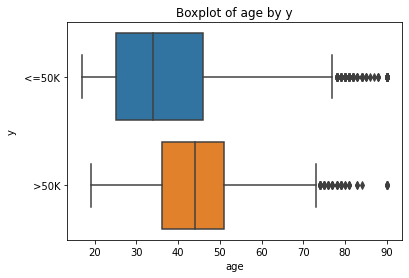

In [26]:
sns.boxplot(data=census, x="age", y="y").set(title='Boxplot of age by y')

**'hours-per-week' predictor**

[Text(0.5, 1.0, 'Boxplot of hours-per-week by y')]

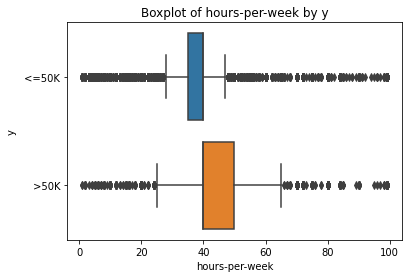

In [27]:
sns.boxplot(data=census, x='hours-per-week', y="y").set(title='Boxplot of hours-per-week by y')

**'education-num' predictor**

[Text(0.5, 1.0, 'Boxplot of education-num by y')]

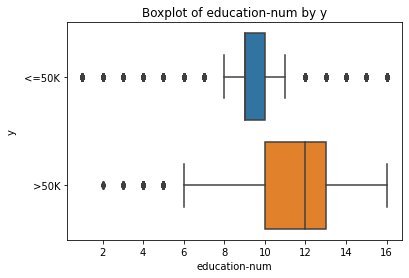

In [28]:
sns.boxplot(data=census, x='education-num', y="y").set(title='Boxplot of education-num by y')

**'captial-loss' predictor**

[Text(0.5, 1.0, 'Boxplot of capital-loss by y')]

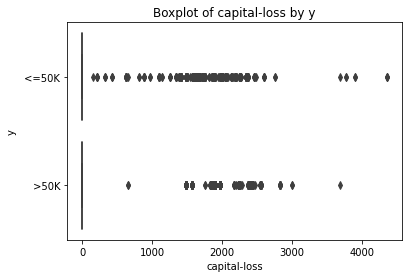

In [29]:
sns.boxplot(data=census, x='capital-loss', y="y").set(title='Boxplot of capital-loss by y')

**'capital gain' predictor**

[Text(0.5, 1.0, 'Boxplot of capital-gain by y')]

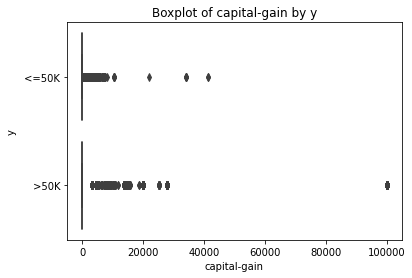

In [30]:
sns.boxplot(data=census, x='capital-gain', y="y").set(title='Boxplot of capital-gain by y')

**'fnlwgt' predictor**

[Text(0.5, 1.0, 'Boxplot of fnlwgt by y')]

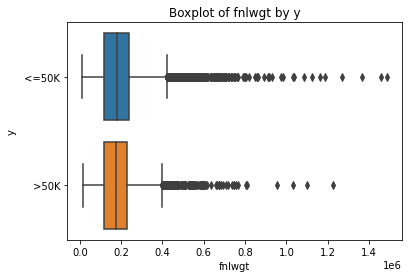

In [31]:
sns.boxplot(data=census, x='fnlwgt', y="y").set(title='Boxplot of fnlwgt by y')

### **Interpretations/Patterns**

** age by y**
* There is a greater number of individuals ranging 25-45 making <=50K 
*  The age range of individuals making >50K is between ~35-50

**hour-per-week by y**
* Individuals working 40-50 hours per week are more likely to make >50K

** education-num by y**
* a higher education-num appears to corelate to individuals making >50K

**fnlwgt by y**
* fnlwgt appears to have similar ranges for those making >50K and <50K
	* The minimum value is 0, the maximum value is around 0.4, and the median is right around .2 for both 


Boxplots for **capital-loss & capital-gain** do not provide any useful information in this portion of the analysis 


##Target Exploration by **Categorical** Predictors

**'workclass' predictor**

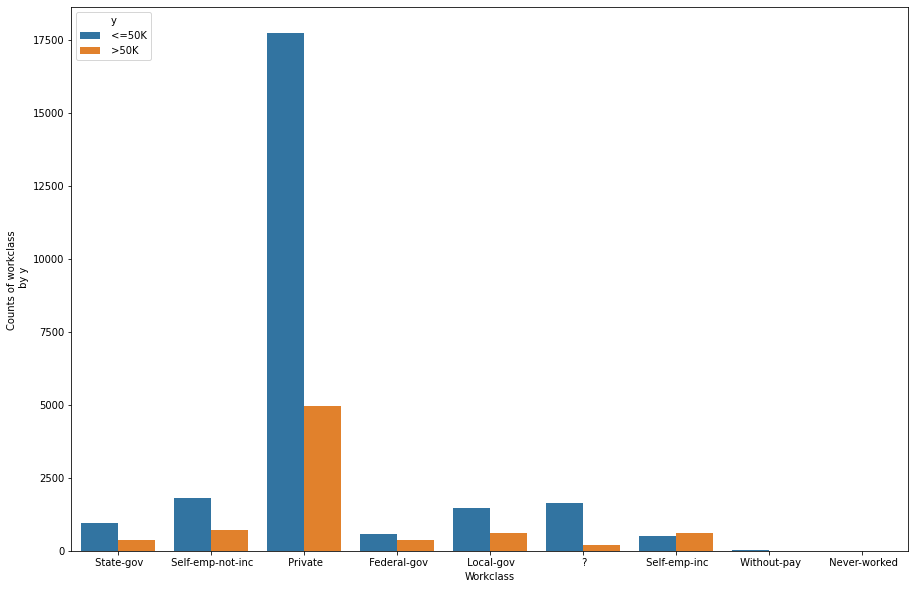

In [32]:
plt.figure(figsize=(15,10))
sns.countplot(data = census, x = 'workclass', hue="y")
plt.xlabel("Workclass")
plt.ylabel("Counts of workclass \n by y")
plt.show()

In [33]:
ct = pd.crosstab(census['workclass'], census['y'])
ct.div(ct.sum(axis=0), axis=1)

y,<=50K,>50K
workclass,,
?,0.066545,0.024359
Federal-gov,0.023827,0.047315
Local-gov,0.059709,0.078689
Never-worked,0.000283,0.000000
Private,0.717354,0.632955
Self-emp-inc,0.019984,0.079327
Self-emp-not-inc,0.073503,0.092335
State-gov,0.038228,0.045020
Without-pay,0.000566,0.000000


**'education' predictor**

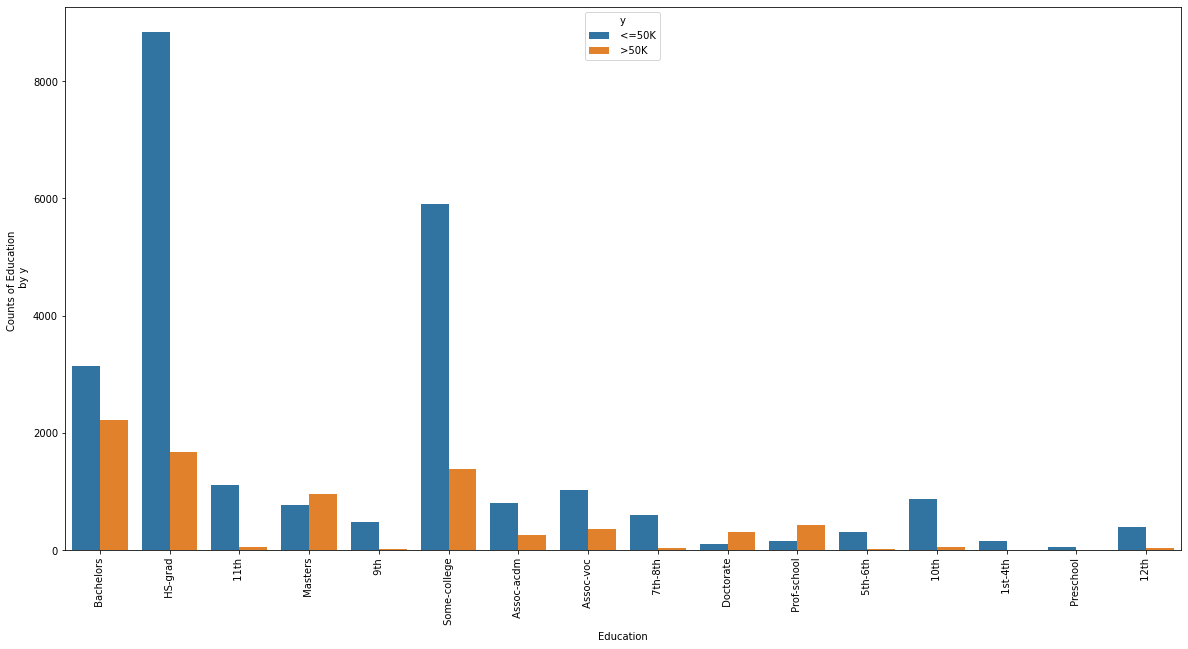

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(data = census, x = 'education', hue="y")
plt.xlabel("Education")
plt.xticks(rotation=90)
plt.ylabel("Counts of Education \n by y")
plt.show()

In [35]:
ct = pd.crosstab(census['education'], census['y'])
ct.div(ct.sum(axis=0), axis=1)

y,<=50K,>50K
education,,
10th,0.035235,0.007907
11th,0.045105,0.007652
12th,0.016181,0.004209
1st-4th,0.006553,0.000765
5th-6th,0.012824,0.002041
7th-8th,0.024515,0.005101
9th,0.019701,0.003443
Assoc-acdm,0.032443,0.033797
Assoc-voc,0.041303,0.046040


**'marital-status' predictor**

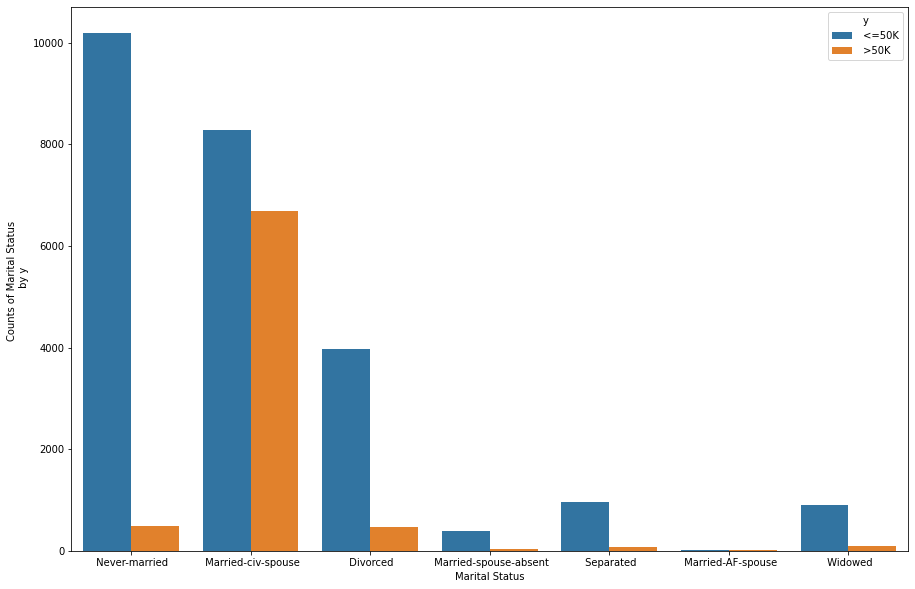

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(data = census, x = 'marital-status', hue="y")
plt.xlabel("Marital Status")
plt.ylabel("Counts of Marital Status \n by y")
plt.show()

In [37]:
ct = pd.crosstab(census['marital-status'], census['y'])
ct.div(ct.sum(axis=0), axis=1)

y,<=50K,>50K
marital-status,,
Divorced,0.161003,0.059049
Married-AF-spouse,0.000526,0.001275
Married-civ-spouse,0.335113,0.853463
Married-spouse-absent,0.015534,0.004336
Never-married,0.412298,0.062620
Separated,0.038794,0.008417
Widowed,0.036731,0.010840


**'occupation' predictor**

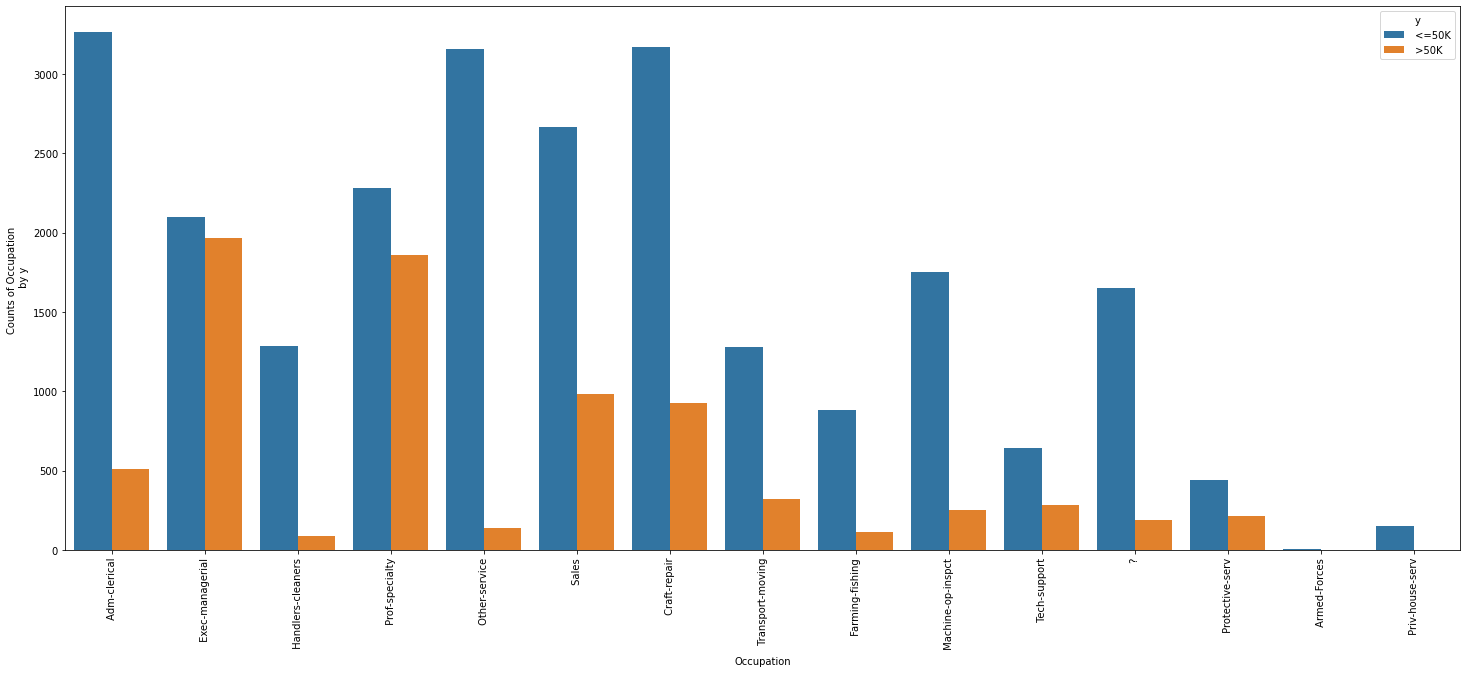

In [38]:
plt.figure(figsize=(25,10))
sns.countplot(data = census, x = 'occupation', hue="y")
plt.xlabel("Occupation")
plt.xticks(rotation=90)
plt.ylabel("Counts of Occupation \n by y")
plt.show()

In [39]:
ct = pd.crosstab(census['occupation'], census['y'])
ct.div(ct.sum(axis=0), axis=1)

y,<=50K,>50K
occupation,,
?,0.066828,0.024359
Adm-clerical,0.131998,0.064660
Armed-Forces,0.000324,0.000128
Craft-repair,0.128236,0.118480
Exec-managerial,0.084871,0.250988
Farming-fishing,0.035558,0.014666
Handlers-cleaners,0.051942,0.010968
Machine-op-inspct,0.070874,0.031884
Other-service,0.127751,0.017472


**'relationship' predictor**

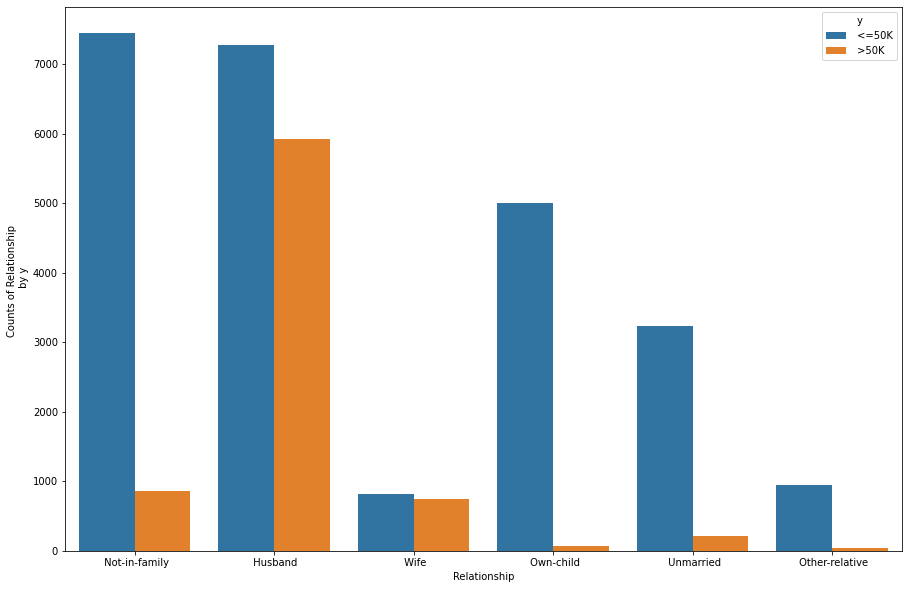

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(data = census, x = 'relationship', hue="y")
plt.xlabel("Relationship")
plt.ylabel("Counts of Relationship \n by y")
plt.show()

In [41]:
ct = pd.crosstab(census['relationship'], census['y'])
ct.div(ct.sum(axis=0), axis=1)

y,<=50K,>50K
relationship,,
Husband,0.294296,0.754751
Not-in-family,0.301335,0.109170
Other-relative,0.038188,0.004719
Own-child,0.202306,0.008545
Unmarried,0.130583,0.027803
Wife,0.033293,0.095013


**'race' predictor**

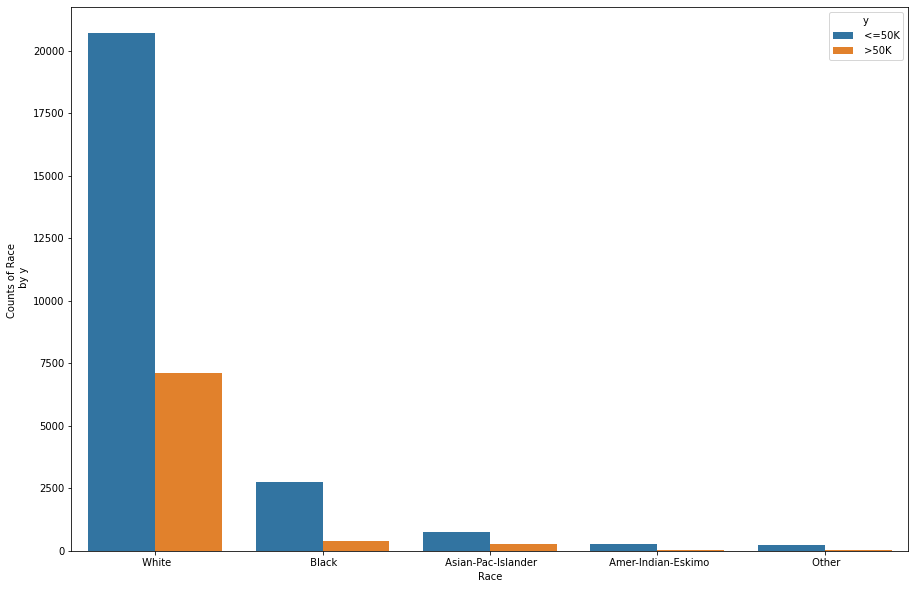

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(data = census, x = 'race', hue="y")
plt.xlabel("Race")
plt.ylabel("Counts of Race \n by y")
plt.show()

In [43]:
ct = pd.crosstab(census['race'], census['y'])
ct.div(ct.sum(axis=0), axis=1)

y,<=50K,>50K
race,,
Amer-Indian-Eskimo,0.011125,0.004591
Asian-Pac-Islander,0.030866,0.035200
Black,0.110720,0.049356
Other,0.009951,0.003188
White,0.837338,0.907665


**'sex' predictor**

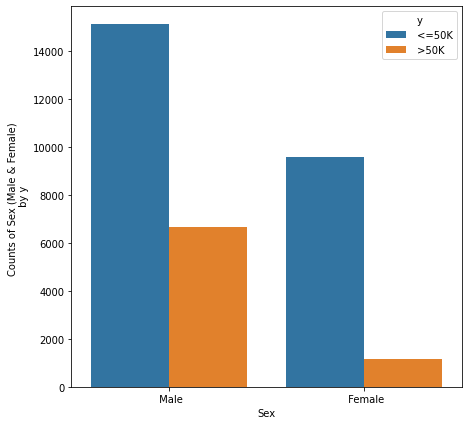

In [44]:
plt.figure(figsize=(7,7))
sns.countplot(data = census, x = 'sex', hue="y")
plt.xlabel("Sex")
plt.ylabel("Counts of Sex (Male & Female) \n by y")
plt.show()

In [45]:
ct = pd.crosstab(census['sex'], census['y'])
ct.div(ct.sum(axis=0), axis=1)

y,<=50K,>50K
sex,,
Female,0.388026,0.150363
Male,0.611974,0.849637


**'native-country' predictor**

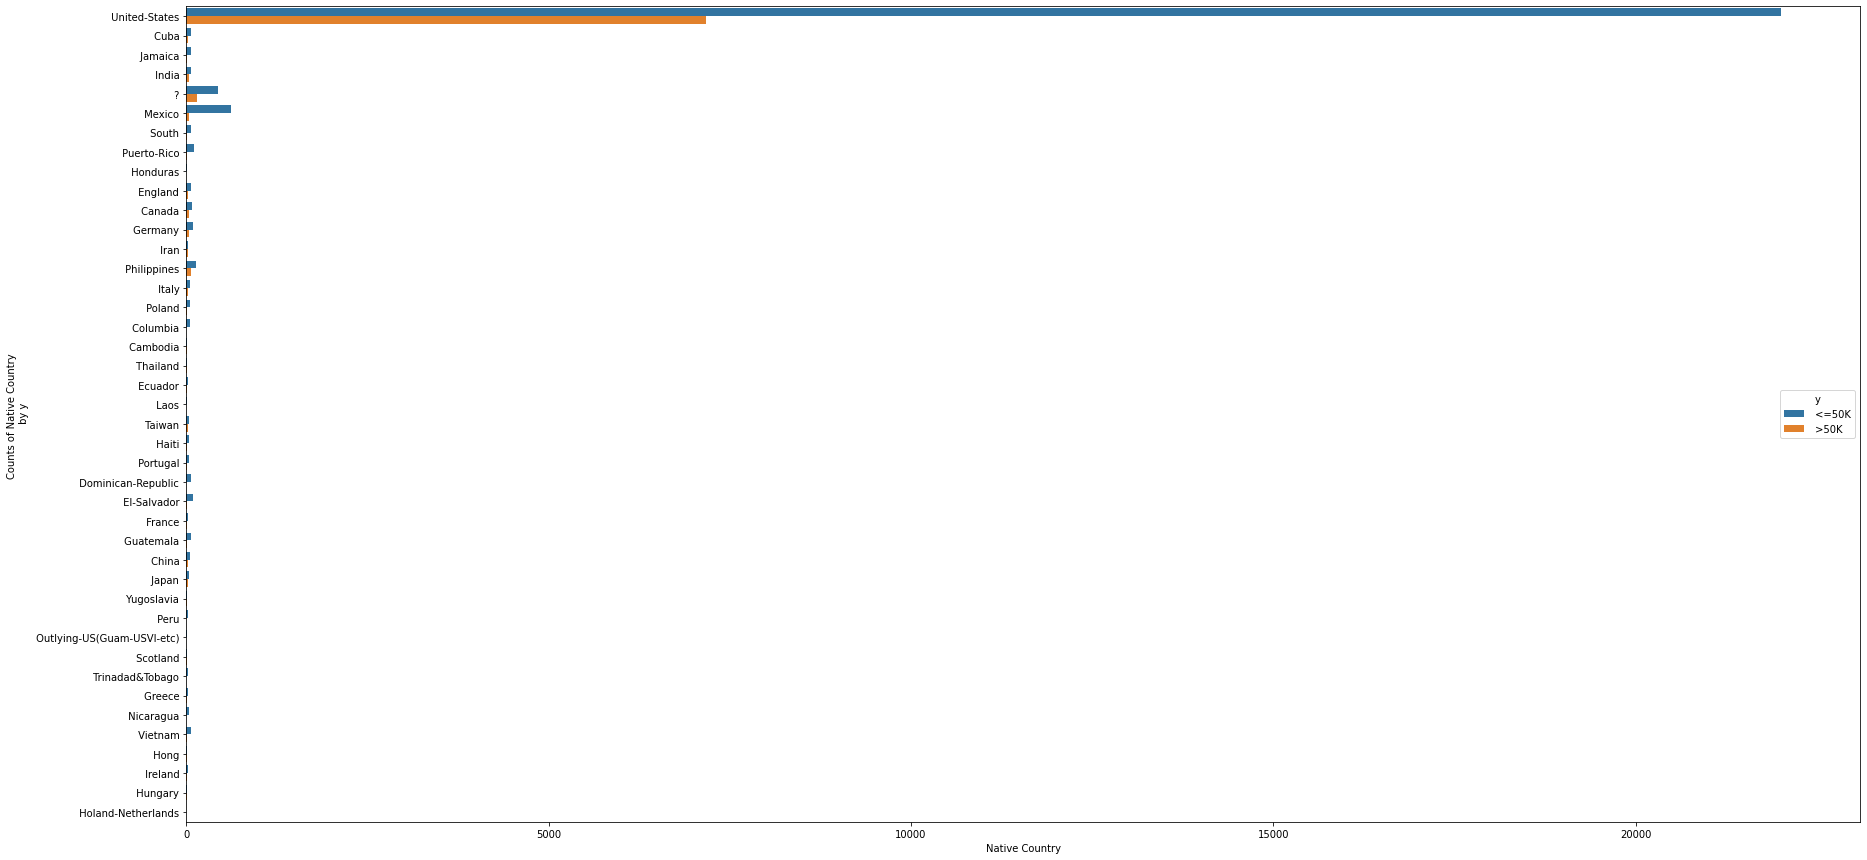

In [46]:
plt.figure(figsize=(30,15))
sns.countplot(data = census, y = 'native-country', hue="y")
plt.xlabel("Native Country")
plt.ylabel("Counts of Native Country \n by y")
plt.show()

In [47]:
ct = pd.crosstab(census['native-country'], census['y'])
ct.div(ct.sum(axis=0), axis=1)

y,<=50K,>50K
native-country,,
?,0.017678,0.018620
Cambodia,0.000485,0.000893
Canada,0.003317,0.004974
China,0.002225,0.002551
Columbia,0.002306,0.000255
Cuba,0.002832,0.003188
Dominican-Republic,0.002751,0.000255
Ecuador,0.000971,0.000510
El-Salvador,0.003924,0.001148


### **Interpretation/Patterns**

**workclass by y**
* There is a greater number of people of people in that workclass Private that make <=50K per year than >50K per year (71.7% vs 63.3%)

**education by y**
* Interesting observation: 21.4% of individuals with a bachelor’s degree earn >50k per year while only 12.2% of individuals with a master’s degree make >50K
* About 24% of people with some college make <=50K while only 18% make more >50K

** marital-status by y**
* 85% of individuals who make >50K are Married-civ-spouse
* A little over 40% of people never married make <=50K

** occupation by y**
* Prof-specialty and Exec-managerial have the highest proportions of individuals making >50K per year
* Sales and Craft-repair have similar proportions of individuals making >50K and <=50K

**relationship by y**
* 75.5% of people who make >50K are husbands
* there is a greater proportion of individuals making <=50K than >50K with the relationship status Not-in-family (30% vs 11%)

**race by y**
* Almost 91% of White individuals in this dataset make >50K and roughly 84% make <=50K
* 11% of Black individuals make <=50K while only ~5% make >50K

**sex by y**
* 38.8% of the females in the dataset make <=50K per year and only about 15.1% make more than 50K per year
* Just over 61% of men in the data make <=50K per year and roughly 85% make >50K

**native-country by y**
* Since there are so many unique values for native-country, the proportions for each country (except the US) in the dataset are very small 
* 91% of individuals who make >50K are from the United States and  89% of individuals who make <=50K are also from the United States



#Task 6: Data Encoding

Machine learning tasks can only handle numeric data, so it is necessary to encode a dataframe that has categorical data or a combination of both numeric and categorical. The pd.get_dummies function is used to transform columns of categorical data into multple columns containing binary values for each row. 

In [48]:
#Dropping the education column 
census = census.drop(['education'], axis=1)

In [49]:
#Setting the target to variable y
y = census[['y']]
#Dropping column 'y' from census dataframe
X = census.drop(['y'], axis=1)
#Encoding the census dataframe
X = pd.get_dummies(X)
#Encoding y variable 
y = pd.get_dummies(y, drop_first=True)

In [50]:
#showing the head of the newly encoded dataframe 
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The results show that there are still 32561 rows/entires in the dataset set, but now there are 92 columns. Encoding the dataframe creates a separate column for each unique instance and turns each of those columns into a binary value. Each new column follows the format -> [column name]_unique value 

With the target variable and education column removed there were only 13 columns in the dataframe prior to encoding; 7 categorical variables and 6 numeric. 



Only categorical columns are encoded--the number of unique columns associated with each original categorical column are:

**workclass** : 9

**marital-status** : 7

**occupation** : 15

**relationship** : 6

**race** : 5

**sex** : 2

**native-country** : 42


*Encoding the dataframe does not affect the numeric columns

#Task 7: Model Building

##**Train/Test Split**

It is important to split your data when modeling to ensure an unbiased evaluation of performance metrics.

In [51]:
#creating train/test split (70% train/30% test)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0,stratify=y)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22792, 92)
(9769, 92)
(22792, 1)
(9769, 1)


##Decision Tree

Using RandomSearchCV to perform a random grid search to find the best combination of hyperparameters.

In [53]:
parameters = {'ccp_alpha':np.arange(0.001, 0.02, 0.001), 
              'criterion' : ['gini','entropy'],
              'splitter' : ['best','random'],
              'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10]
              }

tree_model = tree.DecisionTreeClassifier(random_state=42) 
clf = RandomizedSearchCV(tree_model, 
                         parameters,
                         n_iter=1000, 
                         scoring='f1',
                         cv=3,
                         return_train_score=True)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000,
                   param_distributions={'ccp_alpha': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019]),
                                        'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'splitter': ['best', 'random']},
                   return_train_score=True, scoring='f1')

Creating a for loop to retrieve and format the results of the random grid search

In [54]:
def format_results_random_gs(clf):
  grid_search_results = pd.DataFrame(clf.cv_results_)
  grid_search_results = grid_search_results[['rank_test_score','param_ccp_alpha','param_criterion','param_splitter','param_min_samples_leaf','mean_test_score','mean_train_score']]
  grid_search_results['mean_score_diff_test_train'] = grid_search_results.mean_test_score - grid_search_results.mean_train_score
  return(grid_search_results.sort_values(by='rank_test_score'))

In [55]:
random_search_results = format_results_random_gs(clf)
random_search_results

,rank_test_score,param_ccp_alpha,param_criterion,param_splitter,param_min_samples_leaf,mean_test_score,mean_train_score,mean_score_diff_test_train
30,1,0.001,entropy,best,6,0.655233,0.670387,-0.015153
28,1,0.001,entropy,best,5,0.655233,0.670525,-0.015292
26,3,0.001,entropy,best,4,0.655165,0.670692,-0.015527
24,3,0.001,entropy,best,3,0.655165,0.670692,-0.015527
22,3,0.001,entropy,best,2,0.655165,0.670833,-0.015668
...,...,...,...,...,...,...,...,...
641,747,0.017,gini,random,1,0.000000,0.000000,0.000000
619,747,0.016,gini,random,10,0.000000,0.000000,0.000000
739,747,0.019,gini,random,10,0.000000,0.000000,0.000000
579,747,0.015,gini,random,10,0.000000,0.000000,0.000000


In [56]:
tree_model_3 = tree.DecisionTreeClassifier(criterion= 'entropy',
                                         splitter = 'best',
                                         min_samples_leaf=6,
                                         random_state=42,
                                         ccp_alpha=0.001)
tree_model_pruned= tree_model_3.fit(X_train,y_train)

In [57]:
tree_model_cv_results = pd.DataFrame(cross_validate(tree_model_pruned,
               X_train,
               y_train,
               cv = 5,
               return_train_score=True,
               scoring=['accuracy','recall','precision','f1']))

tree_model_cv_results.mean()

fit_time           0.219625
score_time         0.012090
test_accuracy      0.854203
train_accuracy     0.858887
test_recall        0.572417
train_recall       0.581207
test_precision     0.764675
train_precision    0.777185
test_f1            0.654142
train_f1           0.664695
dtype: float64

In [58]:
y_pred_test = tree_model_pruned.predict(X_test)

In [59]:
print(classification_report(y_pred_test, y_test, target_names=[">50K", "<=50K"])) 

              precision    recall  f1-score   support

        >50K       0.94      0.87      0.91      8035
       <=50K       0.56      0.76      0.64      1734

    accuracy                           0.85      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.87      0.85      0.86      9769



**Best hyperparameters for Decision Tree model:**

* criterion= 'entropy'
* splitter = 'best'
* min_samples_leaf = 6
* ccp_alpha = 0.001



##SVM

In [60]:
parameters = {'C': [40, 45, 50],
              'kernel':['sigmoid','rbf']
              }
svc = SVC(random_state=42)
clf = RandomizedSearchCV(svc, parameters, scoring='f1')
clf.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(random_state=42),
                   param_distributions={'C': [40, 45, 50],
                                        'kernel': ['sigmoid', 'rbf']},
                   scoring='f1')

In [61]:
svm_df = pd.DataFrame(clf.cv_results_)
svm_df.sort_values('mean_test_score',ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,26.506468,0.728665,4.593259,0.431634,rbf,45,"{'kernel': 'rbf', 'C': 45}",0.309715,0.334302,0.328967,0.308148,0.358641,0.327955,0.018482,1
5,27.609804,1.248282,4.430968,0.199335,rbf,50,"{'kernel': 'rbf', 'C': 50}",0.309489,0.334302,0.328727,0.308148,0.358641,0.327861,0.018524,2
1,26.339403,1.851522,4.394373,0.104772,rbf,40,"{'kernel': 'rbf', 'C': 40}",0.309715,0.334302,0.328727,0.307122,0.358641,0.327701,0.018702,3
0,20.370593,0.726352,3.056410,0.256969,sigmoid,40,"{'kernel': 'sigmoid', 'C': 40}",0.271111,0.261152,0.276654,0.265766,0.259871,0.266911,0.006271,4
2,19.590488,0.107255,2.926233,0.022214,sigmoid,45,"{'kernel': 'sigmoid', 'C': 45}",0.271111,0.261152,0.276654,0.265766,0.259871,0.266911,0.006271,4


In [62]:
svm_model = SVC(random_state=42,
                            C=45,
                          kernel='rbf',
                          ).fit(X_train, y_train)

In [63]:
svm_model_cv_results = pd.DataFrame(cross_validate(svm_model,
               X_train,
               y_train,
               cv = 5,
               return_train_score=True,
               scoring=['accuracy','recall','precision','f1']))

svm_model_cv_results.mean()

fit_time           26.407121
score_time          4.472253
test_accuracy       0.797999
train_accuracy      0.797890
test_recall         0.204777
train_recall        0.204910
test_precision      0.824199
train_precision     0.822769
test_f1             0.327955
train_f1            0.328096
dtype: float64

In [64]:
y_pred_test = svm_model.predict(X_test)
print(metrics.classification_report(y_test,y_pred_test, target_names=[">50K", "<=50K"]))

              precision    recall  f1-score   support

        >50K       0.79      0.99      0.88      7417
       <=50K       0.81      0.19      0.31      2352

    accuracy                           0.80      9769
   macro avg       0.80      0.59      0.60      9769
weighted avg       0.80      0.80      0.74      9769



**Best hyperparameters for SVM model:**

* C = 45
* kernel= rbf

##MLP

In [65]:
parameters = {'hidden_layer_sizes':[(5,5),
                                    (10,10),
                                    (100,)],
              'activation':['relu', 'identity'],
              'learning_rate' : ['constant', 'adaptive']
              }
mlp = MLPClassifier(random_state=2021)

clf = GridSearchCV(mlp, parameters,scoring='f1',return_train_score=True,cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=2021),
             param_grid={'activation': ['relu', 'identity'],
                         'hidden_layer_sizes': [(5, 5), (10, 10), (100,)],
                         'learning_rate': ['constant', 'adaptive']},
             return_train_score=True, scoring='f1')

In [66]:
grid_search_df = pd.DataFrame(clf.cv_results_)
grid_search_df.sort_values('mean_test_score',ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
2,2.868609,0.981609,0.020145,0.004720,relu,"(10, 10)",constant,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.413083,0.388247,0.413534,0.404955,0.011816,1,0.410007,0.388140,0.417485,0.405211,0.012451
3,2.881081,0.959312,0.018202,0.001614,relu,"(10, 10)",adaptive,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.413083,0.388247,0.413534,0.404955,0.011816,1,0.410007,0.388140,0.417485,0.405211,0.012451
6,2.321869,0.248499,0.017484,0.003371,identity,"(5, 5)",constant,"{'activation': 'identity', 'hidden_layer_sizes...",0.317253,0.327505,0.418554,0.354437,0.045530,3,0.322413,0.335904,0.423903,0.360740,0.045001
7,1.848325,0.496587,0.015017,0.000563,identity,"(5, 5)",adaptive,"{'activation': 'identity', 'hidden_layer_sizes...",0.317253,0.327505,0.418554,0.354437,0.045530,3,0.322413,0.335904,0.423903,0.360740,0.045001
0,3.459757,1.103364,0.016056,0.001086,relu,"(5, 5)",constant,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.353669,0.408511,0.241009,0.334396,0.069727,5,0.348716,0.421966,0.251558,0.340747,0.069797
1,3.438587,1.048981,0.015723,0.000118,relu,"(5, 5)",adaptive,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.353669,0.408511,0.241009,0.334396,0.069727,5,0.348716,0.421966,0.251558,0.340747,0.069797
4,6.147216,1.277782,0.025298,0.000783,relu,"(100,)",constant,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.371851,0.322804,0.283146,0.325934,0.036281,7,0.370864,0.326229,0.283170,0.326754,0.035803
5,6.279825,1.252873,0.034107,0.013054,relu,"(100,)",adaptive,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.371851,0.322804,0.283146,0.325934,0.036281,7,0.370864,0.326229,0.283170,0.326754,0.035803
8,1.741832,0.228829,0.015242,0.000361,identity,"(10, 10)",constant,"{'activation': 'identity', 'hidden_layer_sizes...",0.393939,0.388783,0.054255,0.278992,0.158927,9,0.381983,0.388508,0.045370,0.271954,0.160241
9,1.741355,0.216402,0.015516,0.000835,identity,"(10, 10)",adaptive,"{'activation': 'identity', 'hidden_layer_sizes...",0.393939,0.388783,0.054255,0.278992,0.158927,9,0.381983,0.388508,0.045370,0.271954,0.160241


In [67]:
mlp_model = MLPClassifier(random_state=2021,
                          hidden_layer_sizes=(10,10), 
                          learning_rate='constant', 
                          activation='relu').fit(X_train,y_train)

In [68]:
mlp_model_cv_results = pd.DataFrame(cross_validate(mlp_model,
               X_train,
               y_train,
               cv = 5,
               return_train_score=True,
               scoring=['accuracy','recall','precision','f1']))

mlp_model_cv_results.mean()

fit_time           3.035124
score_time         0.020112
test_accuracy      0.789970
train_accuracy     0.789849
test_recall        0.253416
train_recall       0.251594
test_precision     0.699735
train_precision    0.696733
test_f1            0.360766
train_f1           0.358257
dtype: float64

In [69]:
y_pred_test = mlp_model.predict(X_test)
print(metrics.classification_report(y_test,y_pred_test, target_names=[">50K", "<=50K"]))

              precision    recall  f1-score   support

        >50K       0.84      0.87      0.85      7417
       <=50K       0.53      0.48      0.50      2352

    accuracy                           0.77      9769
   macro avg       0.68      0.67      0.68      9769
weighted avg       0.77      0.77      0.77      9769



**Best hyperparameters for MLP model:**

* hidden_layer_sizes = (10,10)
* learning_rate = constant 
* activation = relu

##KNN

In [70]:
#using StandardScaler to scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [71]:
parameters = {'n_neighbors': [11,13,25],
              'p':[1,2]}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn,parameters,scoring='f1',return_train_score=True, cv=3)
clf.fit(X_train_scaled, y_train)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [11, 13, 25], 'p': [1, 2]},
             return_train_score=True, scoring='f1')

In [72]:
results_df = pd.DataFrame(clf.cv_results_)
results_df[results_df['rank_test_score']==1]['mean_test_score']
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.012829,0.002619,12.029719,0.163509,11,1,"{'n_neighbors': 11, 'p': 1}",0.612766,0.609199,0.615709,0.612558,0.002662,2,0.669786,0.660286,0.675207,0.668426,0.006167
1,0.011549,0.000961,2.979969,0.147184,11,2,"{'n_neighbors': 11, 'p': 2}",0.610641,0.606851,0.607261,0.608251,0.001698,5,0.673396,0.661114,0.672429,0.668980,0.005576
2,0.010580,0.000381,11.902787,0.172430,13,1,"{'n_neighbors': 13, 'p': 1}",0.618525,0.615385,0.614088,0.615999,0.001863,1,0.661615,0.653142,0.662424,0.659061,0.004198
3,0.011012,0.001205,3.320950,0.602609,13,2,"{'n_neighbors': 13, 'p': 2}",0.612121,0.611550,0.611949,0.611874,0.000239,3,0.663253,0.652638,0.660377,0.658756,0.004483
4,0.010251,0.000270,10.787325,0.173421,25,1,"{'n_neighbors': 25, 'p': 1}",0.611656,0.611026,0.609195,0.610626,0.001044,4,0.641509,0.630883,0.640967,0.637786,0.004887
5,0.010091,0.000183,2.999255,0.142223,25,2,"{'n_neighbors': 25, 'p': 2}",0.607897,0.610494,0.602541,0.606977,0.003311,6,0.635520,0.629310,0.631804,0.632211,0.002551


In [73]:
knn_model =KNeighborsClassifier(n_neighbors=13, p=1).fit(X_train_scaled,y_train)

In [74]:
knn_model_cv_results = pd.DataFrame(cross_validate(knn_model,
               X_train_scaled,
               y_train,
               cv = 5,
               return_train_score=True,
               scoring=['accuracy','recall','precision','f1']))

knn_model_cv_results.mean()

fit_time           0.013721
score_time         8.651701
test_accuracy      0.832134
train_accuracy     0.854072
test_recall        0.555292
train_recall       0.602387
test_precision     0.687681
train_precision    0.743024
test_f1            0.614416
train_f1           0.665329
dtype: float64

In [75]:
y_pred_test = knn_model.predict(X_test_scaled)

In [76]:
print(classification_report(y_pred_test, y_test, target_names=[">50K", "<=50K"])) 

              precision    recall  f1-score   support

        >50K       0.92      0.87      0.89      7889
       <=50K       0.55      0.69      0.61      1880

    accuracy                           0.83      9769
   macro avg       0.74      0.78      0.75      9769
weighted avg       0.85      0.83      0.84      9769



**Best hyperparameters for KNN model:**

* n_neighbors = 13
* p = 1

##Majority Classifier

In [77]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

print(confusion_matrix(y_true=y,y_pred=dummy_clf.predict(X)))

[[24720     0]
 [ 7841     0]]


In [78]:
print(metrics.classification_report(y,dummy_clf.predict(X), target_names=[">50K", "<=50K"]))

              precision    recall  f1-score   support

        >50K       0.76      1.00      0.86     24720
       <=50K       0.00      0.00      0.00      7841

    accuracy                           0.76     32561
   macro avg       0.38      0.50      0.43     32561
weighted avg       0.58      0.76      0.66     32561



accuracy is 76% 


# Evaluation




  

## **Model Evaluation**


The Decision Tree & KNN models were the highest performing models becuase they showed the most improvment in all 3 performance metrics (accuracy, f1-score, and precision).


Accuracy indicates how correct a model is *overall*; it is mathematically defined as the number of correct predictions divided by the total number of predictions. While the accuracy of a model is important and can provide some valuable insight, it is not the best metric to evaluate a model's true performance when using an imbalanced dataset.


Precision indicates a model's ability to accurately predict a specific category; it is the ratio of true positives (TP) to the total number of classified positive predictions (TP+FP). 

Recall indicates what proportion of true positives were actually identified as positive; it is the ratio of true positives (TP) to the total number of positive predictions (TP + FN). 

F1-score is defined as the harmonic mean of precision and recall and is the average of precision and recall scores. The f1-score that weighs both precision and recall in a balanced way and is a single metric that combines aspects of the others.


## **Comparison to Baseline**
The Majority Classifier returned the following results that were then used as a baseline comparison when evaluating each model:

                precision    recall  f1-score   support

        >50K       0.76      1.00      0.86     24720
       <=50K       0.00      0.00      0.00      7841

    accuracy                           0.76     32561
* **accuracy** 76%
* **f1-Score** 86%
* **precision** 76%

***
The following results were achieved for each model after hyperparameter tuning:

**DecisionTree Performance Metrics**

                precision    recall  f1-score   support

        >50K       0.94      0.87      0.91      8035
       <=50K       0.56      0.76      0.64      1734

    accuracy                           0.85      9769


* **accuracy** increased by 9% 
* **f1-Score** increased by 5% 
* **precision** increased by 18% 


***

**SVM Performance Metrics**

                precision    recall  f1-score   support

        >50K       0.79      0.99      0.88      7417
       <=50K       0.81      0.19      0.31      2352

    accuracy                           0.80      9769
   
* **accuracy** increased by 4% 
* **f1-score** increased by 2%
* **precision** increased by 3%

***
**MLP Performance Metrics**

                precision    recall  f1-score   support

        >50K       0.84      0.87      0.85      7417
       <=50K       0.53      0.48      0.50      2352

    accuracy                           0.77      9769
* **accuracy** increased by 1% 
* **f1-score** *decreased* by 1% 
* **precision** increased by 8% 

*This was the model with the worst perfomance
***
**KNN Performance Metrics**

                precision    recall  f1-score   support

        >50K       0.92      0.87      0.89      7889
       <=50K       0.55      0.69      0.61      1880

    accuracy                           0.83      9769

* **accuracy** increased by 13% 
* **f1-score** increased by 3% 
* **precision** increased 16% 



## Final Recommendation

I recommend using the **Decision Tree Classifier** for modeling because it was the highest performing model when compared to the basline. The results for accuracy, f1-score, and precision were:

* **accuracy**: 85%
* **f1-score**: 91%
* **precision**: 94%

All three performance metrics saw improvement when compared to the Majority Classifier.
* Accuracy increased 9%, showing improvement in overall performance
* This model's F1-score reached 91% (5% increase), indicating that it truly did perform better than the baseline when predicting the target variable
* There was also a significant increase in precision (18%), meaning this model was much more accurate when predicting the target variable as well


It is also important to consider the efficiency of a model when evaluating other performance metrics because there can be costs associated with longer run times. Not only did this model achieve the best results, but it was also one of the most efficient. 

#Submission

In [ ]:
#exporting files for submission
!cp "/content/drive/My Drive/Colab Notebooks/final_hise_anna.ipynb" ./
!jupyter nbconvert --to html "final_hise_anna.ipynb"